## VGG19(Classification) 모델 사용
## Dataset, DataLoader, Train/val 클래스화 시키기 
## Test셋에 대한 예측 및 결과를 시각화 

In [1]:
!pip install torch

  Using cached torch-2.0.1-cp310-cp310-win_amd64.whl (172.3 MB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.1.3-cp310-cp310-win_amd64.whl (17 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install torchvision

  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
     ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
     - -------------------------------------- 0.5/15.6 MB 11.3 MB/s eta 0:00:02
     --- ------------------------------------ 1.5/15.6 MB 15.7 MB/s eta 0:00:01
     ------- -------------------------------- 2.7/15.6 MB 21.7 MB/s eta 0:00:01
     ---------- ----------------------------- 4.2/15.6 MB 24.5 MB/s eta 0:00:01
     -------------- ------------------------- 5.6/15.6 MB 24.0 MB/s eta 0:00:01
     ------------------ --------------------- 7.1/15.6 MB 25.1 MB/s eta 0:00:01
     ------------------ --------------------- 7.3/15.6 MB 26.0 MB/s eta 0:00:01
     ------------------ --------------------- 7.3/15.6 MB 26.0 MB/s eta 0:00:01
     ------------------ --------------------- 7.3/15.6 MB 26.0 MB/s eta 0:00:01
     -------------------- ------------------- 8.0/15.6 MB 17.0 MB/s eta 0:00:01
     --------------------- ------------------ 8.4/15.6 MB 1


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.models import vgg19

In [10]:
# 데이터 경로 설정
train_data_dir = './Covid19-dataset/train/'
test_data_dir = './Covid19-dataset/test/'

# 이미지 크기 설정
image_size = (224, 224)

# 미니배치 크기 및 에폭 수 설정
batch_size = 32
epochs = 10

# 데이터 전처리
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [11]:

# 학습 데이터와 테스트 데이터 로딩
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [16]:

# VGG19 모델 불러오기 (사전 학습된 가중치 사용)
model = vgg19(pretrained=True)

# 모델의 분류 레이어 변경 (COVID-19와 비 COVID-19 클래스에 맞게 조정)
num_classes = 3
model.classifier[6] = nn.Linear(4096, num_classes)

# GPU를 사용할 수 있다면 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(device)


In [17]:
# 모델 컴파일
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# 모델 학습
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


Epoch 1/10, Loss: 1.1275769472122192
Epoch 2/10, Loss: 1.0847735404968262
Epoch 3/10, Loss: 1.083399772644043
Epoch 4/10, Loss: 1.1862694025039673
Epoch 5/10, Loss: 4.729391098022461
Epoch 6/10, Loss: 0.6297957897186279
Epoch 7/10, Loss: 1.2760541439056396
Epoch 8/10, Loss: 1.0720996856689453
Epoch 9/10, Loss: 0.9094493985176086
Epoch 10/10, Loss: 0.9110216498374939


In [19]:
model.eval()
correct = 0
total = 0

In [20]:
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 71.21%


c:\na\ComputerVision\Day1\env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\na\ComputerVision\Day1\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Predicted class: Covid


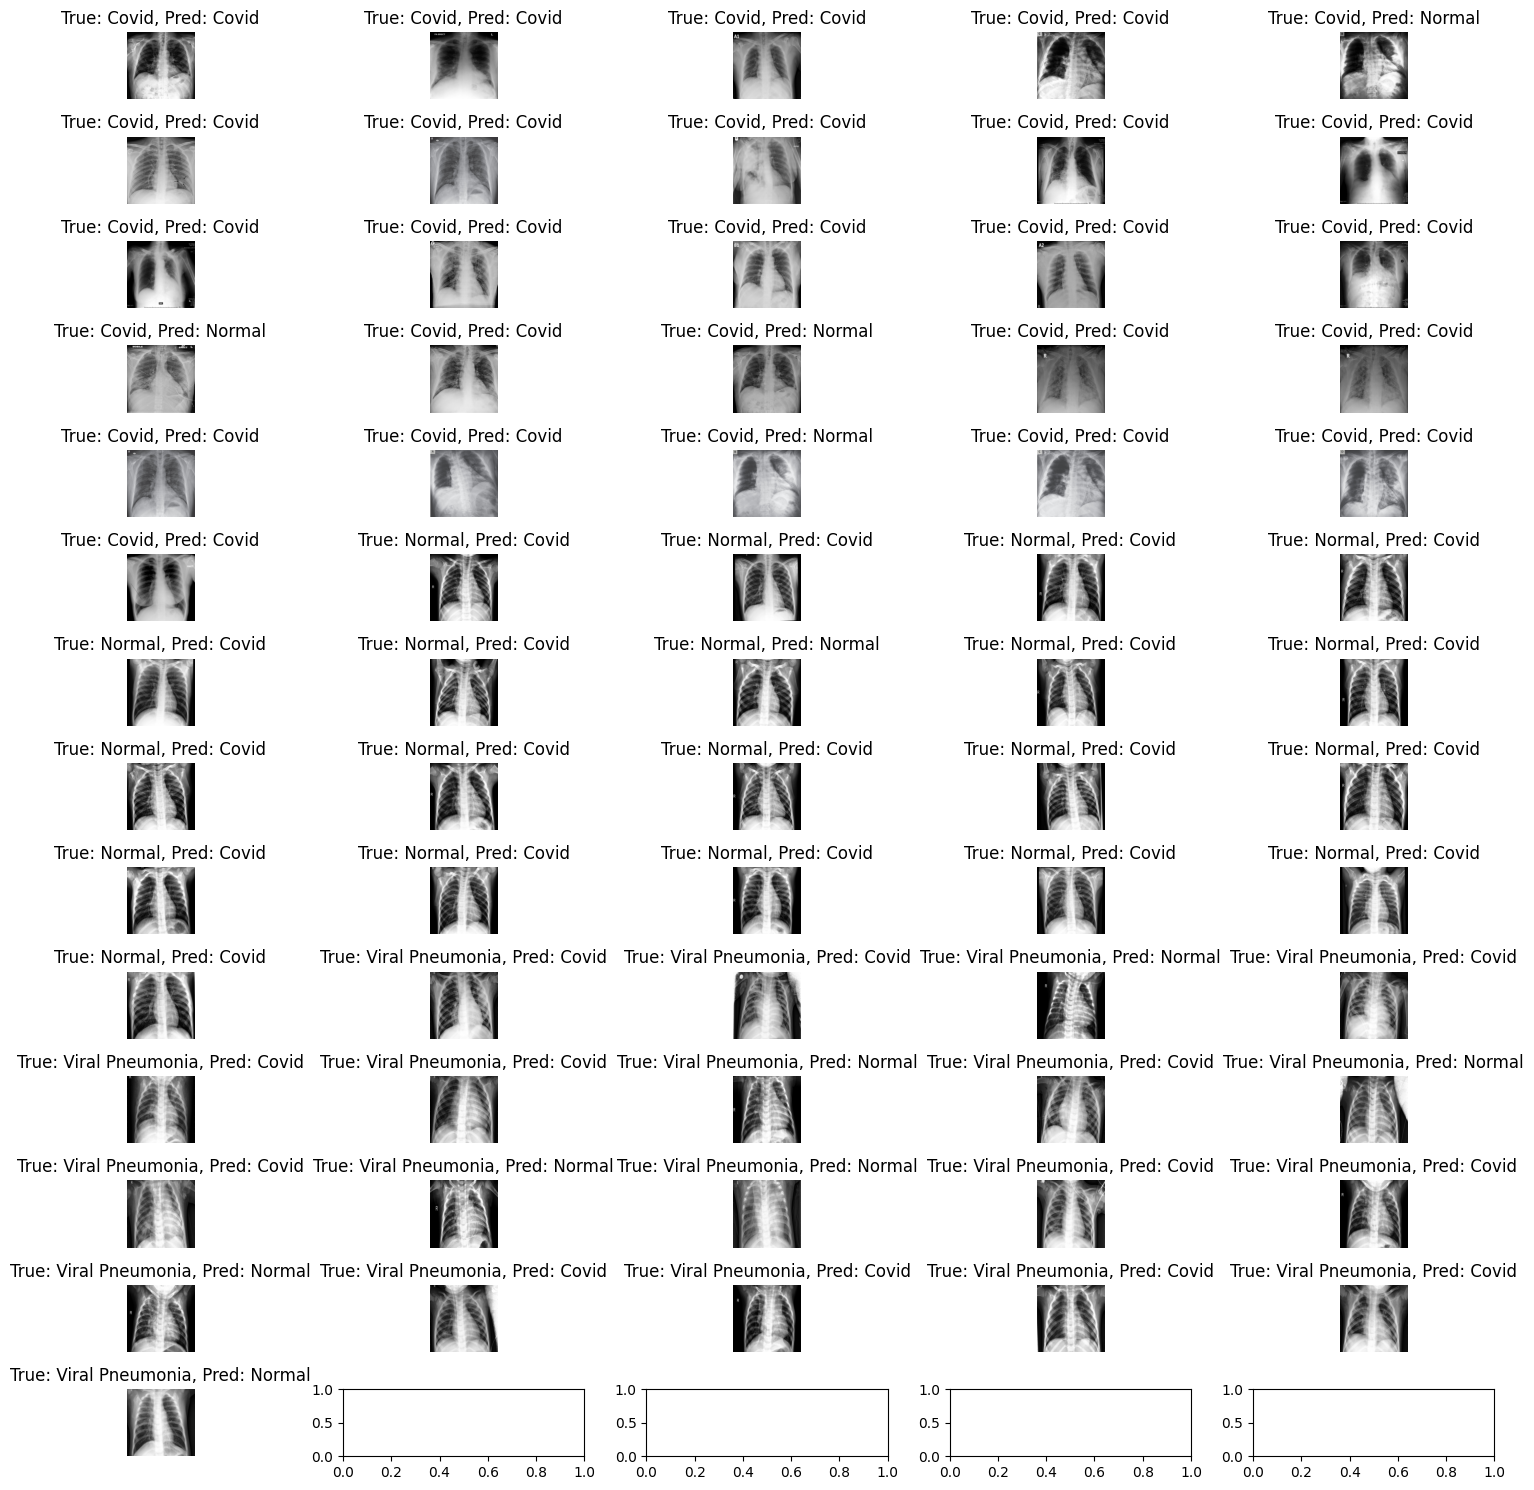

In [29]:
# 테스트 실용적용 

import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 모델 정의 및 가중치 불러오기
class_names = ['Covid', 'Normal', 'Viral Pneumonia']
model = vgg19(pretrained=False)  # 사전 학습 가중치를 사용하지 않는 새로운 모델 생성
model.classifier[6] = nn.Linear(4096, len(class_names))  # 클래스 개수에 맞게 분류 레이어 수정

# 이미지 전처리 및 모델 적용
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    tensor_image = transform(image).unsqueeze(0)
    return tensor_image

# 예측 함수
def predict_image(image_path):
    model.eval()
    image_tensor = preprocess_image(image_path)
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs.data, 1)
        class_name = class_names[predicted.item()]
    return class_name

# 테스트 이미지 경로 설정
test_image_path = './Covid19-dataset/test/Covid/094.png'

# 이미지 예측하여 예측값 프린트 해주기 
predicted_class = predict_image(test_image_path)
print("Predicted class:", predicted_class)
image = Image.open(test_image_path)
plt.imshow(image)
plt.title("Predicted class: " + predicted_class)
plt.axis('off')
plt.show()

# 시각화 함수
def visualize_predictions(model, test_loader, class_names):
    model.eval()
    num_images = len(test_loader.dataset)
    num_cols = 5
    num_rows = num_images // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for i, (inputs, labels) in enumerate(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        image = inputs.cpu().numpy()[0].transpose((1, 2, 0))
        image = (image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]).clip(0, 1)  # 이미지 역전처리
        label_name = class_names[labels.cpu().numpy()[0]]
        predicted_name = class_names[predicted.cpu().numpy()[0]]

        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image)
        ax.set_title(f"True: {label_name}, Pred: {predicted_name}")
        ax.axis('off')

    for i in range(num_images, num_rows * num_cols):
        axes.flatten()[-i - 1].axis('off')

    plt.tight_layout()
    plt.show()

# 테스트 데이터셋 로딩 (새로운 DataLoader 사용)
test_loader_visualize = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 시각화 함수 호출
visualize_predictions(model, test_loader_visualize, class_names)
